![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

#AdaFace

Kim, M., Jain, A. K., & Liu, X. (2022). [AdaFace: Quality Adaptive Margin for Face Recognition](https://openaccess.thecvf.com/content/CVPR2022/papers/Kim_AdaFace_Quality_Adaptive_Margin_for_Face_Recognition_CVPR_2022_paper.pdf). In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 18750-18759).

(c) Adapted by Sebastian Pulgar

# Repository

In [ ]:
!git clone https://github.com/mk-minchul/AdaFace
!mkdir /content/AdaFace/pretrained
!wget https://www.dropbox.com/scl/fi/5pvwapkas67jy9ypoarx3/adaface_ir50_ms1mv2.ckpt?rlkey=kgnqrjajlj2yt2c17dq8zn33r
!mv adaface_ir50_ms1mv2.ckpt?rlkey=kgnqrjajlj2yt2c17dq8zn33r /content/AdaFace/pretrained/adaface_ir50_ms1mv2.ckpt
!pip install pytorch-lightning

Cloning into 'AdaFace'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 233 (delta 56), reused 50 (delta 50), pack-reused 147
Receiving objects: 100% (233/233), 38.94 MiB | 32.66 MiB/s, done.
Resolving deltas: 100% (88/88), done.
--2023-10-18 15:57:07--  https://www.dropbox.com/scl/fi/5pvwapkas67jy9ypoarx3/adaface_ir50_ms1mv2.ckpt?rlkey=kgnqrjajlj2yt2c17dq8zn33r
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b528a9fdc58cb6647c1e6560c.dl.dropboxusercontent.com/cd/0/inline/CF00qak37kSZFpGb_hZAljmmo1X7oQLran_rUv2d9wl_nTFiZeNPsqGm7nZmGGjkcrxu1CIHqQJ--Txd5IXgMlKg1nBhLq-4n_2-CdEJGBtJsK2OpMKz7fca77lsBLMMyRk/file# [following]
--2023-10-18 15:57:08--  https://uc2b528a9fdc58cb6647c1e6560c.dl.dropboxuserco

#Libreries

In [ ]:
import cv2
from   google.colab.patches import cv2_imshow
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#Inference

In [ ]:
%cd /content/AdaFace

/content/AdaFace


In [ ]:
from   face_alignment import align
from   inference import load_pretrained_model, to_input

/content/AdaFace/face_alignment/mtcnn_pytorch/src/align_trans.py:287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if align_type is 'cv2_affine':
/content/AdaFace/face_alignment/mtcnn_pytorch/src/align_trans.py:290: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif align_type is 'affine':


In [ ]:
def get_ada_inference(path,model):
  aligned_rgb_img = align.get_aligned_face(path)
  bgr_input       = to_input(aligned_rgb_img)
  features, _     = model(bgr_input)
  return features

In [ ]:
def ada_sim(path1,path2,model):
  aligned_rgb_img_1 = align.get_aligned_face(path1)
  bgr_input_1       = to_input(aligned_rgb_img_1)
  features_1, _     = model(bgr_input_1) # embedding vector 1x512

  aligned_rgb_img_2 = align.get_aligned_face(path2)
  bgr_input_2       = to_input(aligned_rgb_img_2)
  features_2, _     = model(bgr_input_2) # embedding vector 1x512

  cos = nn.CosineSimilarity(dim=1, eps=1e-6)
  cosine_distance = cos(features_1,features_2)

  return cosine_distance.item()

In [ ]:
model = load_pretrained_model('ir_50')

##Genuine Pair

(two images from the same person)

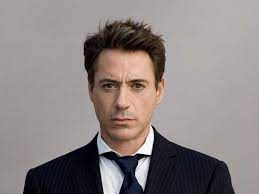

In [ ]:
path1  = 'face_alignment/test_images/img1.jpeg'
image1 = cv2.imread(path1)
cv2_imshow(image1)

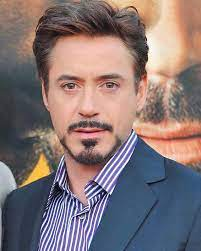

In [ ]:
path2  = 'face_alignment/test_images/img2.jpeg'
image2 = cv2.imread(path2)
cv2_imshow(image2)

In [ ]:
# Robert1 vs Robert2
score = ada_sim(path1,path2,model)
print("score  = {0:f}".format(score))

/content/AdaFace/face_alignment/mtcnn_pytorch/src/matlab_cp2tform.py:90: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
/content/AdaFace/inference.py:25: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  tensor = torch.tensor([brg_img.transpose(2,0,1)]).float()


score  = 0.730538


##Imporstor Pair

(one image from one person and another image from a different person)

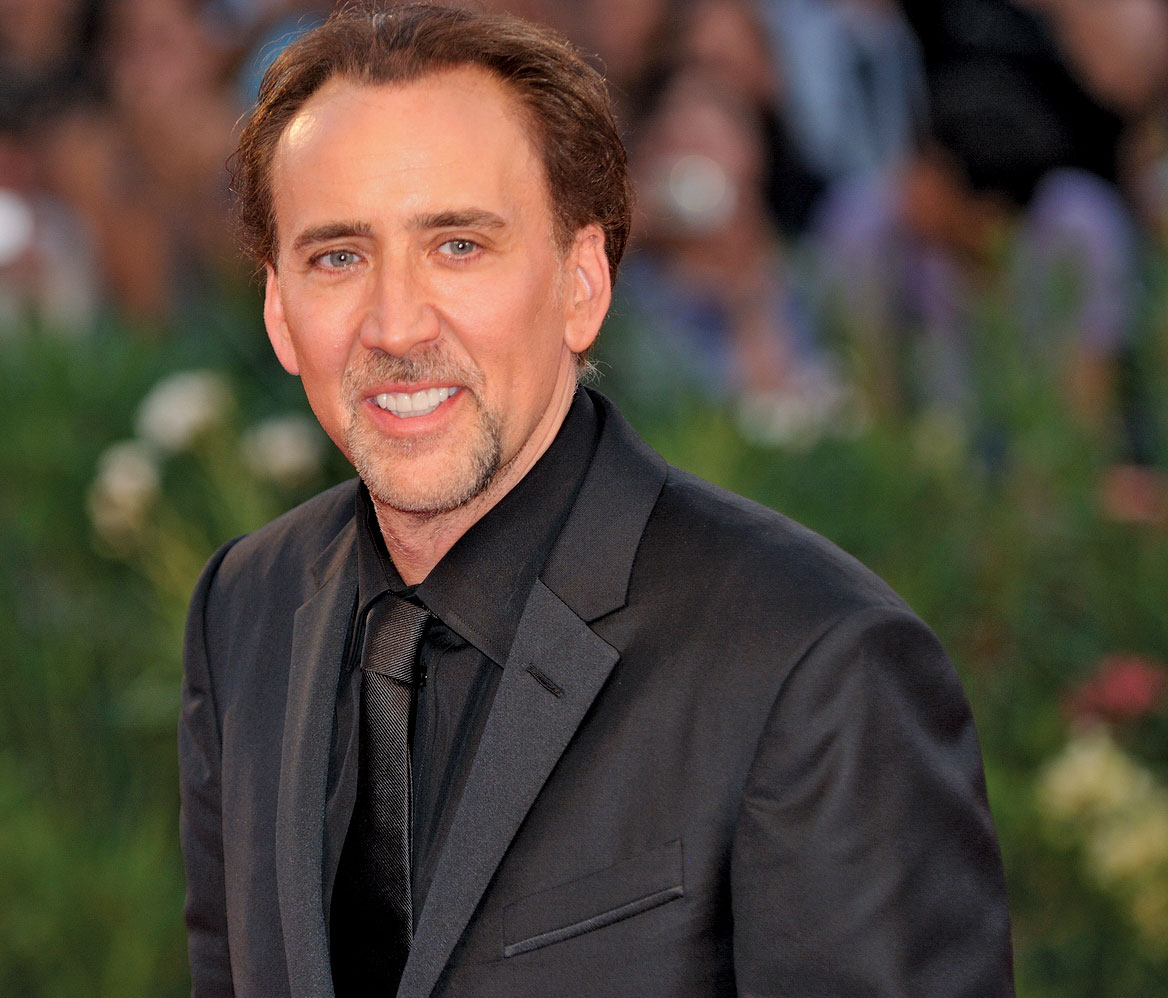

In [ ]:
path3 = 'face_alignment/test_images/img3.jpeg'
image3 = cv2.imread(path3)
cv2_imshow(image3)

In [ ]:
# Robert1 vs nicolas
score = ada_sim(path1,path3,model)
print("score  = {0:f}".format(score))

score  = -0.066627


In [ ]:
# Robert2 vs nicolas
score = ada_sim(path2,path3,model)
print("score  = {0:f}".format(score))

score  = -0.021751
